In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train_set = pd.read_excel("Data_Train.xlsx")

In [2]:
train_set.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


Check for any null values

In [3]:
train_set.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [4]:
train_set.dropna(inplace = True)

In [5]:
train_set.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [6]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


# EDA

We see that the date of journey is object type ..we extract the month and date.

In [7]:
train_set["Day_of_Journey"] = pd.to_datetime(train_set.Date_of_Journey, format="%d/%m/%Y").dt.day

In [8]:
train_set["Month_of_Journey"] = pd.to_datetime(train_set.Date_of_Journey, format="%d/%m/%Y").dt.month

In [9]:
#We drop the Date of Journey column by setting inplace = True
train_set.drop(["Date_of_Journey"], axis = 1, inplace = True)

Similarly we extract hour,min from Dep_Time,Arrival_Time

In [10]:
# Extracting Hours
train_set["Dep_hour"] = pd.to_datetime(train_set["Dep_Time"]).dt.hour

# Extracting Minutes
train_set["Dep_min"] = pd.to_datetime(train_set["Dep_Time"]).dt.minute

# We drop the Dep_Time column by setting inplace = True
train_set.drop(["Dep_Time"], axis = 1, inplace = True)

In [11]:
# Extracting Hours
train_set["Arrival_hour"] = pd.to_datetime(train_set["Arrival_Time"]).dt.hour

# Extracting Minutes
train_set["Arrival_min"] = pd.to_datetime(train_set["Arrival_Time"]).dt.minute

# We drop the Arrival_Time column by setting inplace = True
train_set.drop(["Arrival_Time"], axis = 1, inplace = True)

We split the Duration based on hours and minutes.

In [12]:
train_set['Duration'].unique()

array(['2h 50m', '7h 25m', '19h', '5h 25m', '4h 45m', '2h 25m', '15h 30m',
       '21h 5m', '25h 30m', '7h 50m', '13h 15m', '2h 35m', '2h 15m',
       '12h 10m', '26h 35m', '4h 30m', '22h 35m', '23h', '20h 35m',
       '5h 10m', '15h 20m', '2h 55m', '13h 20m', '15h 10m', '5h 45m',
       '5h 55m', '13h 25m', '22h', '5h 30m', '10h 25m', '5h 15m',
       '2h 30m', '6h 15m', '11h 55m', '11h 5m', '8h 30m', '22h 5m',
       '2h 45m', '12h', '16h 5m', '19h 55m', '3h 15m', '25h 20m', '3h',
       '16h 15m', '15h 5m', '6h 30m', '25h 5m', '12h 25m', '27h 20m',
       '10h 15m', '10h 30m', '1h 30m', '1h 25m', '26h 30m', '7h 20m',
       '13h 30m', '5h', '19h 5m', '14h 50m', '2h 40m', '22h 10m',
       '9h 35m', '10h', '21h 20m', '18h 45m', '12h 20m', '18h', '9h 15m',
       '17h 30m', '16h 35m', '12h 15m', '7h 30m', '24h', '8h 55m',
       '7h 10m', '14h 30m', '30h 20m', '15h', '12h 45m', '10h 10m',
       '15h 25m', '14h 5m', '20h 15m', '23h 10m', '18h 10m', '16h',
       '2h 20m', '8h', '16h 5

In [13]:
s='2h'
s.strip()+" 0m"

'2h 0m'

In [14]:
s='2m'
s="0h "+s #0h 2m  #0h 2
s.split(sep='m')[0].split()[-1] 

'2'

In [15]:
#We split the duration Eg : if only 2h we convert 2h 0m ,if 45m then we convert to 0h 45m
dur_hours=[]
dur_min=[]
duration =list(train_set['Duration'])
for i in range(len(duration)):
    if len(duration[i].split())!=2:
        if 'h' in duration[i].split()[0]:
             duration[i]=duration[i].strip() + " 0m"
        else:
             duration[i]="0h "+duration[i]

In [16]:
#We then assign the hours ,minutes to two different list
for i in range(len(duration)):
    dur_hours.append(duration[i].split(sep='h')[0])
    dur_min.append(duration[i].split(sep='m')[0].split()[-1]) #E

In [17]:
#To add dur_hours and dur_mins list to train_set dataframe
train_set["Duration_hours"] = pd.to_numeric(dur_hours)
train_set["Duration_mins"] = pd.to_numeric(dur_min)
#Drop the Duration column
train_set.drop(["Duration"], axis = 1, inplace = True)

In [18]:
train_set.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


We see some categorical data .We can use OnHotEncoding for the non ordinal data

In [19]:
train_set['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

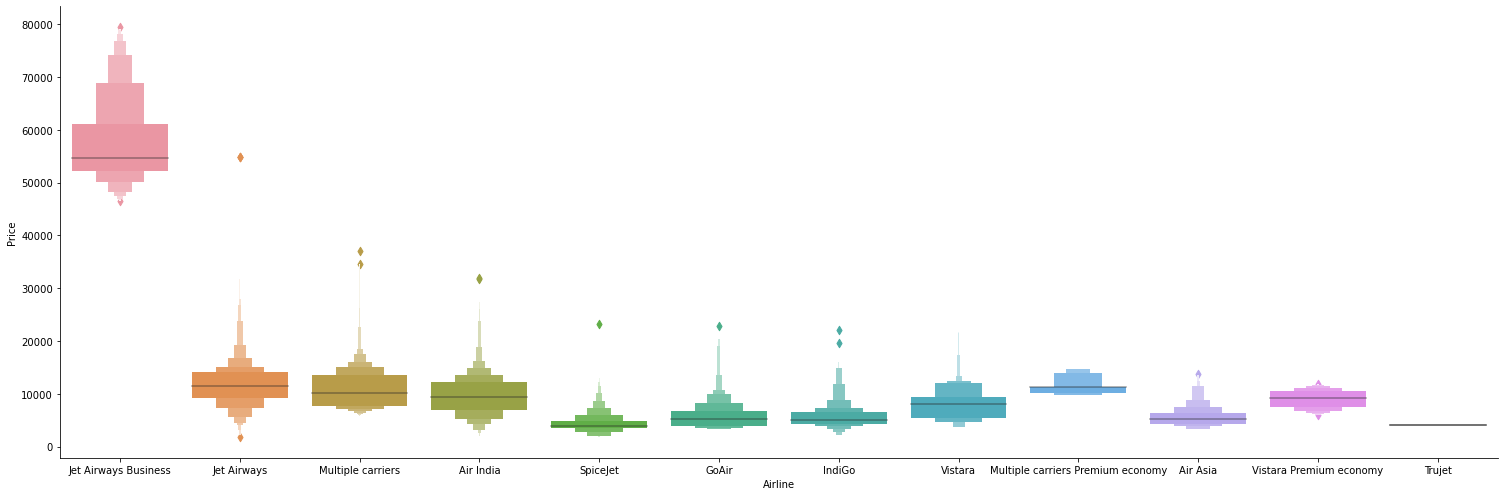

In [20]:
# Airline vs Price
sns.catplot(y = "Price", x = "Airline", data = train_set.sort_values("Price", ascending = False), kind="boxen", height = 7, aspect = 3)
plt.show()

The above plot shows us that Jet Airways Business class has the highest price

We can use OneHotEncoding for Airlines as it is not ordinal

In [21]:
a = train_set[["Airline"]]
a = pd.get_dummies(a, drop_first= True)
a.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


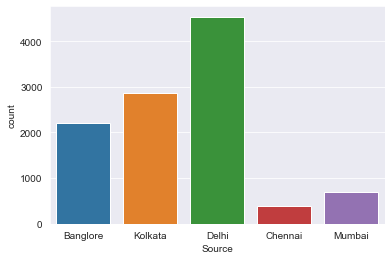

In [22]:
sns.set_style('darkgrid')
sns.countplot('Source',data=train_set)

The plot shows us that maximum flight started from Delhi

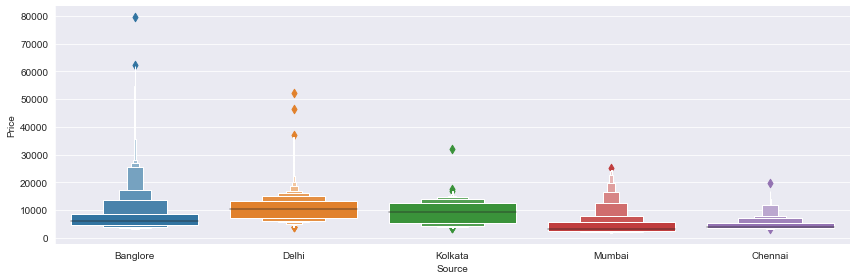

In [23]:
sns.catplot(y = "Price", x = "Source", data = train_set.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

In [24]:
#Encoding for Source
s = train_set[["Source"]]

s = pd.get_dummies(s, drop_first= True)

s.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


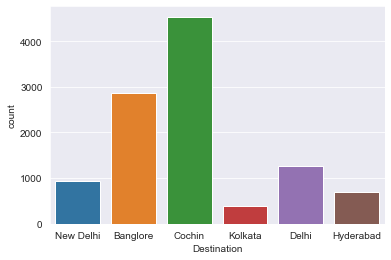

In [25]:
sns.set_style('darkgrid')
sns.countplot('Destination',data=train_set)

In [26]:
#Encoding for Destination
d = train_set[["Destination"]]

d = pd.get_dummies(d, drop_first= True)

d.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [27]:
#Converting the Total Stops column to numerical values
train_set['Total_Stops']= train_set.Total_Stops.map({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4})

In [28]:
#We drop Route and Additional Info column as they do not add much information
train_set.drop(["Airline", "Source", "Destination","Route","Additional_Info"], axis = 1, inplace = True)

In [29]:
train_set.head()

,Total_Stops,Price,Day_of_Journey,Month_of_Journey,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,0,3897,24,3,22,20,1,10,2,50
1,2,7662,1,5,5,50,13,15,7,25
2,2,13882,9,6,9,25,4,25,19,0
3,1,6218,12,5,18,5,23,30,5,25
4,1,13302,1,3,16,50,21,35,4,45


In [30]:
#Concatenating trainset with encoded Airline,Source and Destination
train_set = pd.concat([train_set,a,s,d], axis = 1)

In [31]:
train_set.head()

,Total_Stops,Price,Day_of_Journey,Month_of_Journey,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1


In [32]:
train_set.columns

Index(['Total_Stops', 'Price', 'Day_of_Journey', 'Month_of_Journey',
       'Dep_hour', 'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [33]:
from sklearn.model_selection import train_test_split
y=train_set['Price']
x=train_set.drop('Price',axis=1)

In [34]:
#We use ExtraTreesRegressor for finding feature importance
from sklearn.ensemble import ExtraTreesRegressor
f = ExtraTreesRegressor()
f.fit(x, y)
f.feature_importances_

array([2.10833858e-01, 1.43513301e-01, 5.35873849e-02, 2.44093221e-02,
       2.04852535e-02, 2.80388595e-02, 1.98869057e-02, 1.30334305e-01,
       1.83246438e-02, 9.05575995e-03, 1.70533163e-03, 1.69803881e-02,
       1.44174866e-01, 6.73396955e-02, 1.92827672e-02, 8.42377402e-04,
       2.82044208e-03, 1.08460104e-04, 4.92719678e-03, 7.70239051e-05,
       3.91377597e-04, 9.75563235e-03, 3.20072171e-03, 7.20016970e-03,
       8.38217149e-03, 2.05847459e-02, 8.27862503e-03, 4.71117241e-04,
       2.50072965e-02])

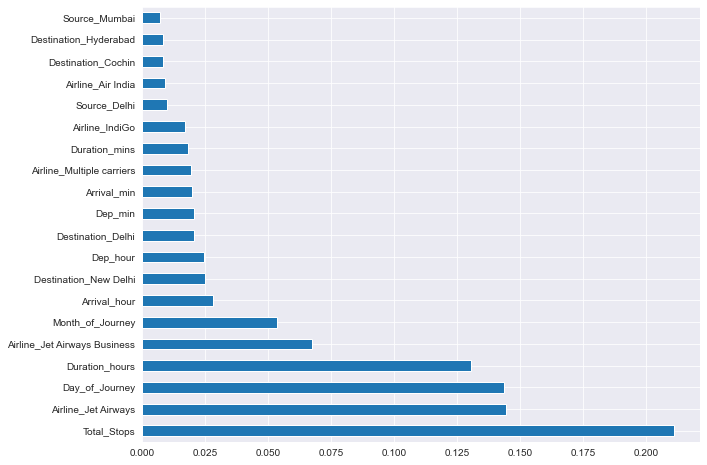

In [35]:
plt.figure(figsize = (10,8))
feat_importances = pd.Series(f.feature_importances_, index=x.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

We see that Total_Stops has the highest feature importance

# Model Creation and Evaluation

In [36]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from xgboost import plot_importance
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(x, y,random_state=10)
clf = RandomForestRegressor()
clf.fit(X_train,y_train)

RandomForestRegressor()

In [37]:
y_pred = clf.predict(X_test)
y_pred

array([10245.88933333, 12755.56666667, 12448.33416667, ...,
       11747.30344264,  4879.72      , 10274.6       ])

In [38]:
predictions = [round(value) for value in y_pred]
accuracy = clf.score(X_train,y_train)
print("Training accuracy :",accuracy)

Training accuracy : 0.9563408460589886


In [39]:
accuracy = clf.score(X_test,y_test)
print("Test accuracy :",accuracy)

Test accuracy : 0.8011116325010609


# HyperParameter Tuning

In [40]:
#We use  GridSearchCross validation for choosing best parameters
grid_param = {
    "n_estimators" : [90,100,115],
    'min_samples_leaf' : [1,2,4],
    "max_depth": [2,5,10],
    'min_samples_split': [4,5,7],
    'max_features' : ['auto','log2','sqrt']
}
grid_search = GridSearchCV(estimator=clf,param_grid=grid_param,cv=5,n_jobs =-1,verbose = 3)
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   24.0s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:   39.4s
[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1136 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 1215 out of 1215 | elapsed:  3.8min finished


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 10],
                         'max_features': ['auto', 'log2', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [4, 5, 7],
                         'n_estimators': [90, 100, 115]},
             verbose=3)

In [41]:
grid_search.best_params_

{'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 115}

In [42]:
rand_clf = RandomForestRegressor(max_features = 'auto',min_samples_leaf = 1,min_samples_split= 4,n_estimators = 115,max_depth=10)

In [ ]:
rand_clf.fit(X_train,y_train)
accuracy=rand_clf.score(X_test,y_test)
print("Test accuracy :",accuracy)

In [ ]:
y_pred = rand_clf.predict(X_test)

We see that test accuracy has improved after hyperparamter tuning.

In [ ]:
plt.figure(figsize = (6,5))
plt.scatter(y_test, y_pred,alpha=0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [ ]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test,y_pred))
print('MSE:', metrics.mean_squared_error(y_test,y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

# Saving the model inorder to use it again

In [ ]:
import pickle
#Open a file, where you want to store the data
file = open('flight.pickle', 'wb')

#dump information to that file
pickle.dump(rand_clf, file)

In [ ]:
m = open('flight.pickle','rb')
loaded_model = pickle.load(m)
y_prediction = loaded_model.predict([[0,20,1,20,49,0,49,20,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0]])
y_prediction[0]